<a href="https://colab.research.google.com/github/ancestor9/2025_Winter_Deep-Learning-with-TensorFlow/blob/main/20260114_04_pytorch/Pytorch_in_a_Hour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE 5-STEP DEEP LEARNING RECIPE [click](https://www.youtube.com/watch?v=r1bquDz5GGA)**

| Step | Concept (Math) | From Scratch (Raw Tensors) | Professional (`torch.nn`) |
|------|----------------|----------------------------|---------------------------|
| **1. Prediction** | Make a prediction:<br>$\hat{y} = f(X, \theta)$ | `y_hat = X @ W + b` | `y_hat = model(X)` |
| **2. Loss Calc** | Quantify the error:<br>$L = \text{Loss}(\hat{y}, y)$ | `loss = torch.mean((y_hat - y)**2)` | `loss = criterion(y_hat, y)` |
| **3. Gradient Calc** | Find the slope of the loss:<br>$\nabla_\theta L$ | `loss.backward()` | `loss.backward()` |
| **4. Param Update** | Step down the slope:<br>$\theta_{t+1} = \theta_t - \eta\nabla_\theta L$ | `W -= lr * W.grad` | `optimizer.step()` |
| **5. Gradient Reset** | Reset for the next loop. | `W.grad.zero_()` | `optimizer.zero_grad()` |

### **1. IT SENDS A MESSAGE TO THE AUTOGRAD ENGINE:**
"This is a parameter. From now on, track every single operation that happens to it."

In [1]:
import torch

# A standard data tensor
x_data = torch.tensor([[1., 2.], [3., 4.]])

# A parameter tensor (we NEED gradients)
w = torch.tensor([[1.0], [2.0]],
                 requires_grad=True)

print(f"Data tensor requires_grad: {x_data.requires_grad}")
print(f"Parameter tensor requires_grad: {w.requires_grad}")

Data tensor requires_grad: False
Parameter tensor requires_grad: True


### PyTorch의 Autograd(자동 미분) 엔진이 연산 과정을 어떻게 추적하는가?

In [2]:
import torch

# BUILDING THE GRAPH
# Goal: Compute z = x · y, where y = a + b

# Three parameter tensors
a = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(3.0, requires_grad=True)
x = torch.tensor(4.0, requires_grad=True)

# Compute y = a + b
y = a + b

# Compute z = x · y
z = x * y

print(f"Tensor a = {a.item()}")
print(f"Tensor b = {b.item()}")
print(f"Tensor x = {x.item()}")
print(f"Tensor y = {y.item()}")
print(f"Tensor z = {z.item()}")

Tensor a = 2.0
Tensor b = 3.0
Tensor x = 4.0
Tensor y = 5.0
Tensor z = 20.0


In [3]:

# z는 곱셈 결과이므로 MulBackward 관련 객체가 출력됩니다.
print(f"grad_fn for z: {z.grad_fn}")

# y는 덧셈 결과이므로 AddBackward 관련 객체가 출력됩니다.
print(f"grad_fn for y: {y.grad_fn}")

# a는 사용자가 직접 만든 텐서(Leaf Node)이므로 grad_fn이 None입니다.
print(f"grad_fn for a: {a.grad_fn}")

print("-" * 30)

# 4. 역전파 수행 (5-Step Recipe의 3단계)
z.backward()

# 5. 기울기 확인 (a가 z에 미친 영향력)
print(f"a의 기울기(dz/da): a가 z에 미친 영향력 --> {a.grad}")

grad_fn for z: <MulBackward0 object at 0x7dd90c07cdf0>
grad_fn for y: <AddBackward0 object at 0x7dd90c07d360>
grad_fn for a: None
------------------------------
a의 기울기(dz/da): a가 z에 미친 영향력 --> 4.0


In [4]:
print("Autograd가 계산한 기울기(Gradients): if x = 4")
print(f"a의 기울기 (dz/da): {a.grad}") # z = x*y = 4*(a+b) 이므로 미분값은 4
print(f"b의 기울기 (dz/db): {b.grad}") # z = x*y = 4*(a+b) 이므로 미분값은 4

Autograd가 계산한 기울기(Gradients): if x = 4
a의 기울기 (dz/da): 4.0
b의 기울기 (dz/db): 4.0


### **WE HAVE THE Tensor (THE NOUN).**

### **WE HAVE Autograd (THE NERVOUS SYSTEM).**

- Tensor: 딥러닝에서 데이터를 담는 기본 단위(명사)

- Autograd: 텐서들 사이에서 일어나는 모든 연산을 감시하고 기록하는 신경망과 같은 시스템

- grad_fn: 각 텐서가 어떤 연산(곱셈, 덧셈 등)을 통해 태어났는지에 대한 '족보'를 담고 있으며, 이를 통해 역전파 시 기울기를 계산

### **NOW, WE NEED OPERATIONS. --> THE "VERBS" OF PYTORCH.**

In [5]:
# 4. 행렬 연산 예시 (Matrix Multiplication)
# Shape: (2, 3)
m1 = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)
# Shape: (3, 2)
m2 = torch.tensor([[7, 8], [9, 10], [11, 12]], dtype=torch.float32)

# Resulting shape will be: (2, 2)
matrix_product = m1 @ m2
print(f"Matrix Product Shape: {matrix_product.shape}")
print(f"Matrix Product Result:\n{matrix_product}")

Matrix Product Shape: torch.Size([2, 2])
Matrix Product Result:
tensor([[ 58.,  64.],
        [139., 154.]])


# THE SETUP: CREATING OUR DATA
## We'll create fake data that follows the line `y = 2x + 1` with some noise.

In [30]:
# Our batch of data will have 10 data points
N = 10
# Each data point has 1 input feature and 1 output value
D_in = 1
D_out = 1

# Create our input data X
X = torch.randn(N, D_in)

# Create our true target labels y by using the "true" W and b
# The "true" W is 2.0, the "true" b is 1.0
true_W = torch.tensor([[2.0]])
true_b = torch.tensor(1.0)
y_true = X @ true_W + true_b + torch.randn(N, D_out) * 0.1  # Add a little noise

print(f"Input X shape: {X.shape}")
print(f"True labels y shape: {y_true.shape}")
print(f"\nFirst 5 data points:")
print(f"X:\n{X[:5]}")
print(f"y_true:\n{y_true[:5]}")

Input X shape: torch.Size([10, 1])
True labels y shape: torch.Size([10, 1])

First 5 data points:
X:
tensor([[ 1.0299],
        [-0.1468],
        [ 0.5569],
        [ 1.9389],
        [-0.5073]])
y_true:
tensor([[3.0182],
        [0.5758],
        [2.0330],
        [5.0012],
        [0.0736]])


Text(0, 0.5, 'y_true')

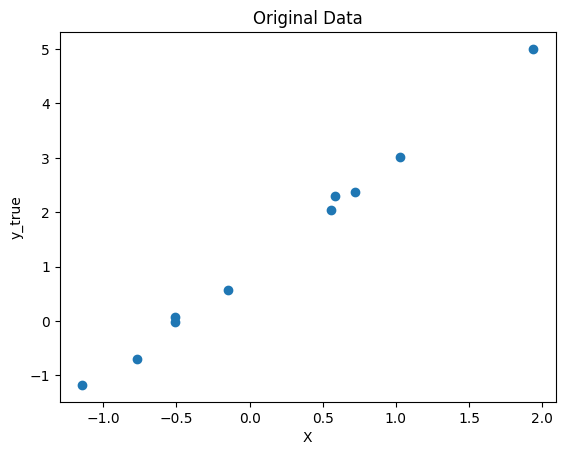

In [31]:
import matplotlib.pyplot as plt

plt.scatter(X, y_true)
plt.title("Original Data")
plt.xlabel("X"); plt.ylabel("y_true")

### 모델 학습의 본질
- 딥러닝 모델이 데이터를 통해 학습하는 궁극적인 목표

THE MODEL WILL NEVER SEE true_W OR true_b.

ITS JOB IS TO DISCOVER THEM JUST BY LOOKING AT X AND y_true.

In [32]:
import torch

# 1. THE PARAMETERS: THE MODEL'S "BRAIN"
# 모델이 학습할 파라미터를 랜덤하게 초기화
# requires_grad=True를 통해 Autograd 엔진에 "모든 연산을 추적하라"는 메시지를 보냅니다.
W = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print(f"Initial Weight W:\n {W}")
print(f"Initial Bias b:\n {b}\n")

Initial Weight W:
 tensor([[-0.0088]], requires_grad=True)
Initial Bias b:
 tensor([0.2762], requires_grad=True)



In [33]:
# 2. THE NERVOUS SYSTEM: Autograd 연산 추적
# Prediction 연산 (Verbs)
# m1 @ m2 형태의 행렬 곱이 수행됩니다.
y_hat = X @ W + b

In [34]:
# 예측 수행
print(f"Prediction y_hat (first 3 rows):\n {y_hat[:3]}") # 예측값 확인
print(f"True Labels y_true (first 3 rows):\n {y_true[:3]}") # 실제 정답 확인

Prediction y_hat (first 3 rows):
 tensor([[0.2671],
        [0.2775],
        [0.2713]], grad_fn=<SliceBackward0>)
True Labels y_true (first 3 rows):
 tensor([[3.0182],
        [0.5758],
        [2.0330]])


### PROBLEM: QUANTIFY THE ERROR
We have y_hat (our guess) and y_true (the truth).

In [35]:
# Let's calculate the loss
error = y_hat - y_true
squared_error = error ** 2
loss = squared_error.mean()

print(f"Loss (our single scorecard number): {loss}")

Loss (our single scorecard number): 4.498709201812744


### INSPECTING THE RESULT: THE GRADIENT IS THE ANSWER

In [36]:
# Compute gradients
loss.backward()

# The gradients are now stored in the .grad attribute
print(f"Gradient for W (∂L/∂W):\n {W.grad}\n")
print(f"Gradient for b (∂L/∂b):\n {b.grad}")

Gradient for W (∂L/∂W):
 tensor([[-3.6674]])

Gradient for b (∂L/∂b):
 tensor([-2.1464])


In [37]:
# Hyperparameters
learning_rate, epochs = 0.01, 100

# Re-initialize parameters
W, b = torch.randn(1, 1, requires_grad=True), torch.randn(1, 1, requires_grad=True)

# --- 변하는 값을 저장할 리스트(데이터셋) 생성 ---
history = []

# Training Loop
for epoch in range(epochs):
    # Forward pass and loss
    y_hat = X @ W + b
    loss = torch.mean((y_hat - y_true)**2)

    # Backward pass
    loss.backward()

    # 현재의 W, b, loss 값을 기록 (데이터셋 형태)
    # .item()을 써서 텐서가 아닌 일반 숫자로 저장합니다.
    history.append({
        'epoch': epoch,
        'W': W.item(),
        'b': b.item(),
        'loss': loss.item()
    })

    # Update parameters
    with torch.no_grad():
        W -= learning_rate * W.grad; b -= learning_rate * b.grad

    # Zero gradients, 과거 그레디언트를 지운다.
    W.grad.zero_(); b.grad.zero_()

In [39]:
# 5. 결과 확인 (상위 5개 데이터 출력)
import pandas as pd
df = pd.DataFrame(history)
df # 데이터프레임 형태로 변환하여 출력

,epoch,W,b,loss
0,0,0.310145,1.241887,2.382461
1,1,0.338059,1.242919,2.305102
2,2,0.365500,1.243832,2.230366
3,3,0.392475,1.244631,2.158158
4,4,0.418992,1.245319,2.088392
...,...,...,...,...
95,95,1.646255,1.133909,0.128620
96,96,1.652041,1.132413,0.125076
97,97,1.657734,1.130928,0.121640
98,98,1.663337,1.129452,0.118309


In [42]:
print(W)
print(b)

tensor([[1.6743]], requires_grad=True)
tensor([[1.1265]], requires_grad=True)


### 확인 코드

Epoch [200/1000], Loss: 178.2844
Epoch [400/1000], Loss: 175.6269
Epoch [600/1000], Loss: 175.6221
Epoch [800/1000], Loss: 175.6221
Epoch [1000/1000], Loss: 175.6221


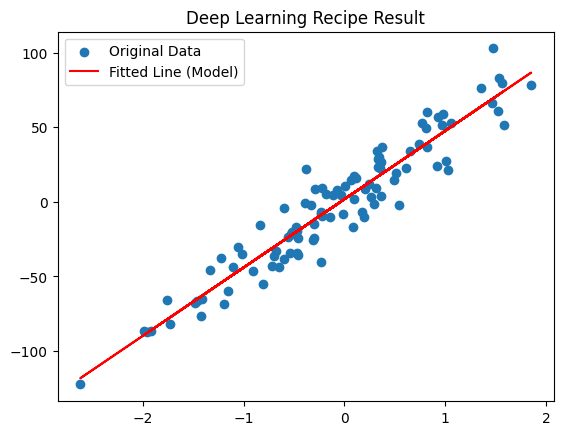

In [40]:
import torch
import torch.nn as nn
from sklearn.datasets import make_regression

# 1. 데이터 생성 (1개의 특징, 노이즈 추가)
X_numpy, y_numpy = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# 2. PyTorch 텐서로 변환 (모델 학습을 위해 float32 형변환 필요)
X = torch.from_numpy(X_numpy).float()
y = torch.from_numpy(y_numpy).float().view(-1, 1) # y의 형태를 (100, 1)로 맞춤

# 3. 모델 설정 (nn.Linear(입력1, 출력1))
model = nn.Linear(1, 1)
criterion = nn.MSELoss() # Loss 함수 (2단계)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # 업데이트 도구 (4, 5단계)

# 4. 학습 루프 (The 5-Step Recipe)
epochs = 1000
for epoch in range(epochs):
    # Step 1: Prediction
    y_hat = model(X)

    # Step 2: Loss Calc
    loss = criterion(y_hat, y)

    # Step 5: Gradient Reset (보통 계산 전에 초기화)
    optimizer.zero_grad()

    # Step 3: Gradient Calc
    loss.backward()

    # Step 4: Param Update
    optimizer.step()

    if (epoch+1) % 200 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 5. 결과 시각화
predicted = model(X).detach().numpy() # 모델의 최종 예측값

plt.scatter(X.numpy(), y.numpy(), label='Original Data')
plt.plot(X.numpy(), predicted, color='red', label='Fitted Line (Model)')
plt.legend()
plt.title("Deep Learning Recipe Result")
plt.show()

In [41]:
print(W)
print(b)

tensor([[1.6743]], requires_grad=True)
tensor([[1.1265]], requires_grad=True)
